In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import lib.dataset as dataset
import lib.network as network
import lib.path as path
import lib.utils as  utils
from collections import deque
from tensorflow.python.tools import inspect_checkpoint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
params=json.loads(open('params.json').read())["TRAIN_PARAMS"]

In [3]:
n=np.load("/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/aws/model_2018-03-15_18:04:43_L:0.001_E:10_B:16/epoch_5/train_loss.npy")

In [4]:
# get preprocessed data
data_all, label_all = dataset.get_preprocessed_dataset()

# split dataset
X_train, y_train, X_val, y_val, X_test, y_test = dataset.train_val_test_split(
    data_all, label_all)


np.save('X_test',X_test)
np.save('y_test',y_test)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


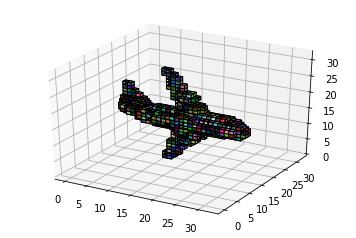

In [5]:
y=np.load(y_train[1])
colors=np.random.rand(32,32,32,4)
im=utils.vis_voxel(y,colors)

In [6]:
net = network.Network()
X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')
x=dataset.from_npy(X_test)
y=dataset.from_npy(y_test)

encoder
recurrent_module
decoder
loss
optimizer
Instructions for updating:
keep_dims is deprecated, use keepdims instead
misc op
initalize variables


In [7]:
model_dir="/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/aws/model_2018-03-15_18:04:43_L:0.001_E:10_B:16/epoch_5"
net.restore(model_dir)
y_hat=net.predict(x)

INFO:tensorflow:Restoring parameters from b'/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/aws/model_2018-03-15_18:04:43_L:0.001_E:10_B:16/epoch_5/model/variables/variables'


In [8]:
y_hat[1][0]

array([[[[ 0.49979886,  0.50020111],
         [ 0.50127643,  0.49872363],
         [ 0.4995653 ,  0.50043464],
         ..., 
         [ 0.50238979,  0.49761027],
         [ 0.50133616,  0.49866384],
         [ 0.50043911,  0.49956086]],

        [[ 0.49759808,  0.50240189],
         [ 0.5021866 ,  0.4978134 ],
         [ 0.50309753,  0.49690247],
         ..., 
         [ 0.50067437,  0.4993256 ],
         [ 0.49923909,  0.50076085],
         [ 0.50132751,  0.49867246]],

        [[ 0.49937388,  0.50062609],
         [ 0.50151581,  0.49848425],
         [ 0.50071317,  0.49928686],
         ..., 
         [ 0.50118393,  0.4988161 ],
         [ 0.50280678,  0.49719319],
         [ 0.50101906,  0.49898091]],

        ..., 
        [[ 0.49833041,  0.50166953],
         [ 0.50258553,  0.49741441],
         [ 0.5009259 ,  0.4990741 ],
         ..., 
         [ 0.49834388,  0.50165612],
         [ 0.499181  ,  0.50081897],
         [ 0.50012046,  0.49987948]],

        [[ 0.50076497,  0.4992

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


ValueError: Invalid RGBA argument: 0.49979886

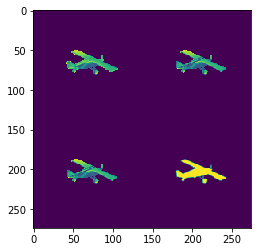

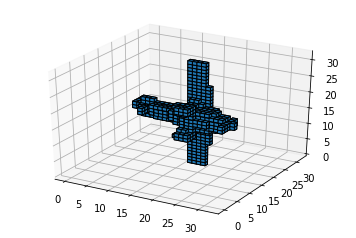

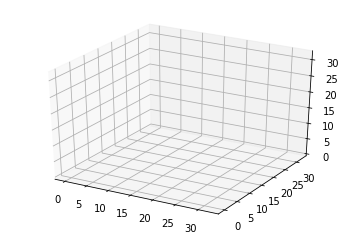

In [13]:
utils.vis_multichannel(x[0][1])
utils.vis_voxel(y[0]) 
utils.vis_voxel(y_hat[0][0],y_hat[1][0])

In [ ]:
for i in range(24):
    utils.vis_montage(x[0][i],2)